# line chart
# word cloud

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('merged_data_withkeywords.csv')

In [12]:
df.head()

,title,publicationName,abstract,keywords,subjectArea,publication_date,combined,processed,Top_Three_Keywords,One_keyword
0,Effects of iron content on the microstructure ...,Materials Chemistry and Physics,© 2018The microstructure and corrosion behavio...,"EIS,Microstructure,Pitting corrosion,Polarizat...","MATE,PHYS",01/10/2018,Effects of iron content on the microstructure ...,effects iron content microstructure corrosion ...,"alloys, corrosion, exhibit",alloys
1,The critical factors of research and innovatio...,International Journal of Trade and Global Markets,Copyright © 2018 Inderscience Enterprises Ltd....,"Critical factors,Innovation creation,Public un...","BUSI,ECON",01/01/2018,The critical factors of research and innovatio...,critical factors research innovation creation ...,"universities, creation, innovation",universities
2,Is the occiput-wall distance valid and reliabl...,Musculoskeletal Science and Practice,© 2018Background: Hyperkyphosis may be frequen...,"Cobb angle,Dowager's hump,Round back,Spine",HEAL,01/12/2018,Is the occiput-wall distance valid and reliabl...,occiput-wall distance valid reliable determine...,"hyperkyphosis, owd, thoracic",hyperkyphosis
3,Comparison of soil composition between farmlan...,Eurasian Journal of Analytical Chemistry,© 2018 Society for Innovative Research. All ri...,"Agriculture land management,Conserved area,Soi...","PHAR,CHEM",01/01/2018,Comparison of soil composition between farmlan...,comparison soil composition farmlands conserve...,"farmlands, soils, conserved",farmlands
4,The impact of wire caliber on ERCP outcomes: a...,Gastrointestinal Endoscopy,© 2018Background and Aims: Wire-guided biliary...,NaN,MEDI,01/06/2018,The impact of wire caliber on ERCP outcomes: a...,impact wire caliber ercp outcomes multicenter ...,"inch, cannulation, wire",inch


In [13]:
df['Top_Three_Keywords']

0                alloys, corrosion, exhibit
1        universities, creation, innovation
2              hyperkyphosis, owd, thoracic
3               farmlands, soils, conserved
4                   inch, cannulation, wire
                        ...                
22601          som, trajectory, intelligent
22602      airworthiness, propulsion, evtol
22603                aeroengine, lstm, path
22604       aerodynamics, propulsion, evtol
22605            200kw, aviation, precision
Name: Top_Three_Keywords, Length: 22606, dtype: object

In [14]:
df['Top_Three_Keywords'].value_counts()

Top_Three_Keywords
preface, 00, 000                         26
introduction, 00, 000                    14
foreword, 00, 000                        11
chair, message, general                   8
editorial, 00, 000                        6
                                         ..
personnel, room, operating                1
liposuction, dysmorphic, affiliations     1
cost, production, material                1
dialysis, perspective, global             1
200kw, aviation, precision                1
Name: count, Length: 22409, dtype: int64

cov, sars                  
higgs, boson             
covid, 19   

In [15]:
keyword_count = {}
for k in df['Top_Three_Keywords']:
    keywords = k.split(', ')
    #keyword = ' '.join(keywords)
    for keyword in keywords:
        if keyword in keyword_count:
            keyword_count[keyword] += 1
        else:
            keyword_count[keyword] = 1


I have keyword counted dict ex) {'proton': 86,
 'covid': 79,
 'hiv': 74,
 'boson': 67,
 'higgs': 59,
 'co2': 58,
 'waste': 52,
 'liver': 49,
 'health': 49,
 'species': 47,
 'cov': 45, 

In [16]:
keyword_count = dict(sorted(keyword_count.items(), key=lambda item: item[1], reverse=True))
keyword_count

{'00': 148,
 'proton': 143,
 'covid': 130,
 'hiv': 101,
 'co2': 95,
 '000': 94,
 'boson': 89,
 'cancer': 86,
 'oil': 82,
 'species': 81,
 'students': 75,
 'cov': 75,
 'higgs': 72,
 'health': 69,
 'liver': 68,
 'patients': 67,
 '19': 65,
 'waste': 63,
 'adsorption': 60,
 'children': 60,
 'films': 57,
 'learning': 56,
 'bone': 55,
 'catalyst': 54,
 'rice': 54,
 'aki': 52,
 'dogs': 51,
 'pain': 50,
 'tio2': 50,
 'drug': 49,
 'vaccine': 49,
 'depression': 48,
 'soil': 48,
 'quark': 47,
 'food': 47,
 'dengue': 47,
 'il': 46,
 'sars': 46,
 'cell': 45,
 'women': 45,
 'catalysts': 45,
 'energy': 45,
 'innovation': 44,
 'top': 43,
 'extraction': 43,
 'groundwater': 43,
 'sleep': 43,
 'risk': 42,
 'education': 42,
 'care': 41,
 'oral': 41,
 'kidney': 41,
 'concrete': 41,
 'composites': 40,
 'skin': 40,
 'pla': 40,
 'cats': 40,
 'power': 39,
 'breast': 39,
 'biodiesel': 39,
 'elderly': 38,
 'sensor': 38,
 'older': 38,
 'biomass': 38,
 'nursing': 38,
 'production': 37,
 'hpv': 37,
 'schizophrenia'

In [17]:
def split_two(x):
    list = x.split(', ')
    return list

In [18]:
'01/06/2018'
'2023-06'

'2023-06'

In [19]:
def set_date(x):
    m = x.split('/')[1]
    y = x.split('/')[2]
    return y+'-'+m

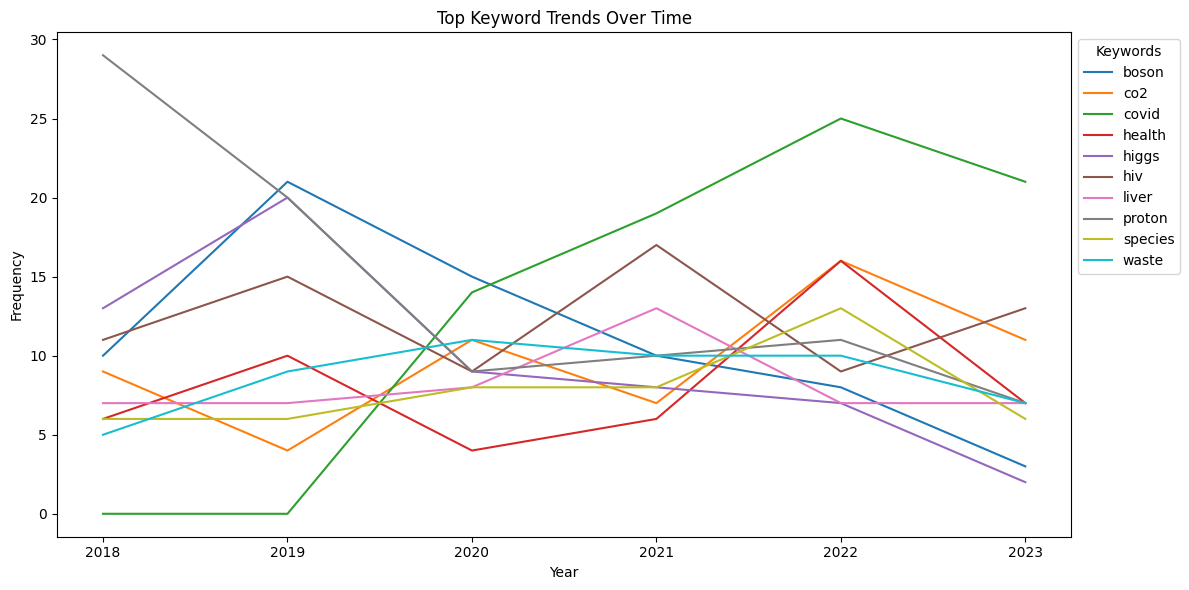

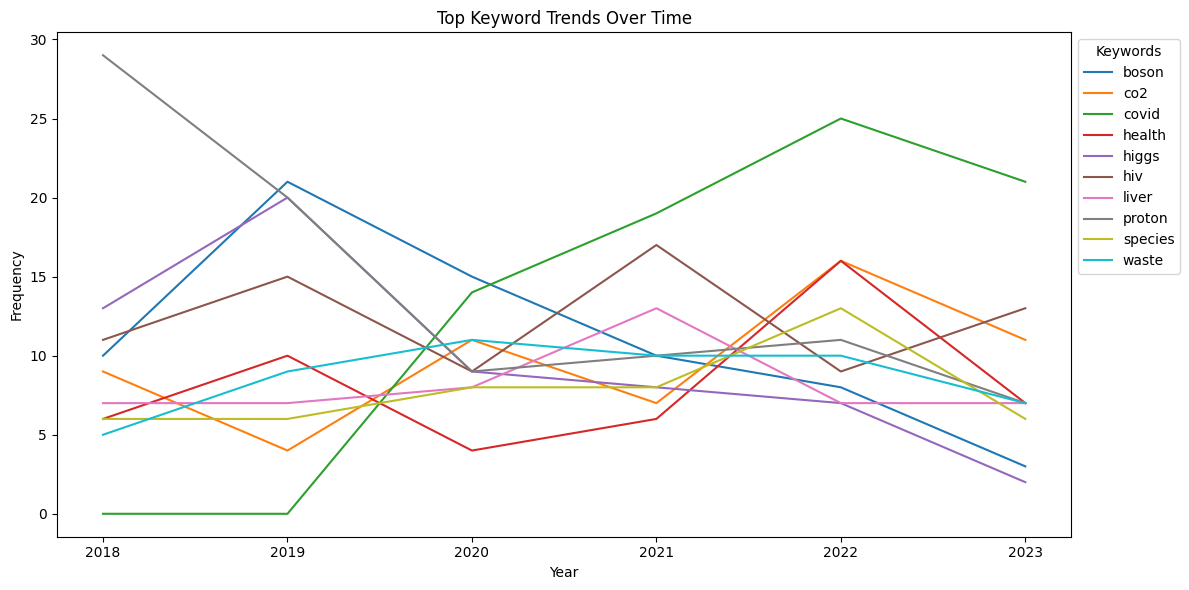

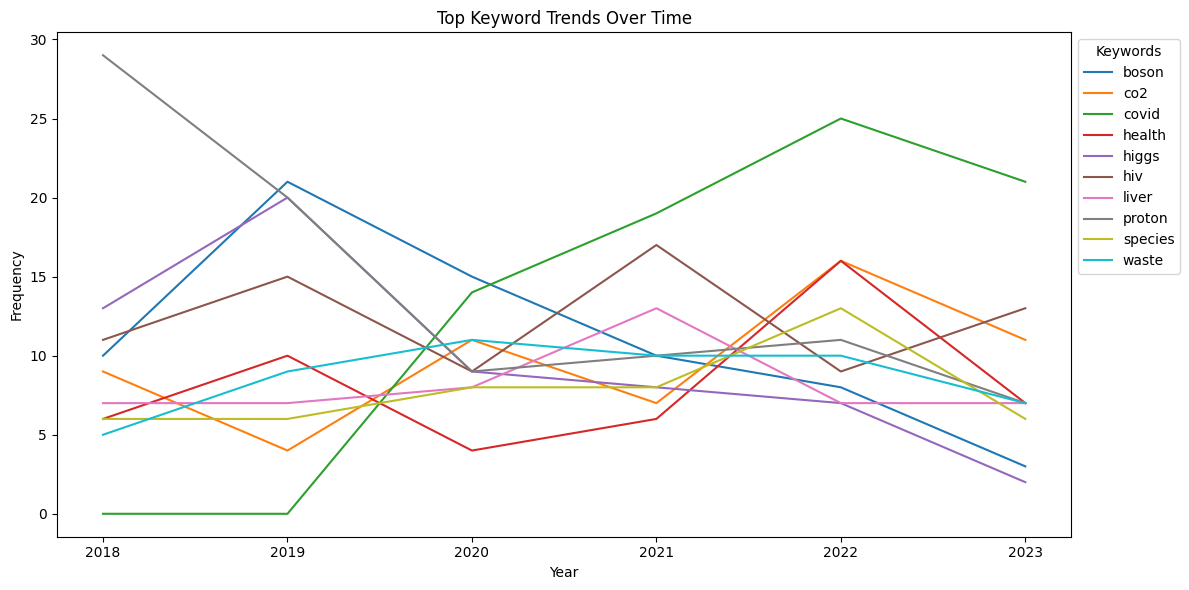

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert publication_date to datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%d/%m/%Y')

# Expand Top_Two_Keywords into individual rows
keywords_df = df.assign(Top_Two_Keywords=df['Top_Two_Keywords'].str.split(', ')).explode('Top_Two_Keywords')

# Extract year for aggregation
keywords_df['year'] = keywords_df['publication_date'].dt.year

# Count total occurrences of each keyword and filter top N
keyword_counts = keywords_df['Top_Two_Keywords'].value_counts()
top_keywords = keyword_counts.head(10).index  # Adjust number of keywords as needed
filtered_data = keywords_df[keywords_df['Top_Two_Keywords'].isin(top_keywords)]

# Group by year and keyword
trend_data = filtered_data.groupby(['year', 'Top_Two_Keywords']).size().unstack(fill_value=0)

# Plot the trends
plt.figure(figsize=(12, 6))
for keyword in trend_data.columns:
    plt.plot(trend_data.index, trend_data[keyword], label=keyword)

plt.title("Top Keyword Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Keywords", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [44]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_chula2.csv')

# Convert publication_date to datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%d/%m/%Y')

# Expand Top_Two_Keywords into individual rows
keywords_df = df.assign(Top_Two_Keywords=df['Top_Two_Keywords'].str.split(', ')).explode('Top_Two_Keywords')

# Extract year for aggregation
keywords_df['year'] = keywords_df['publication_date'].dt.year

# Streamlit Title
st.title("Keyword Trends Over Time")

# Sidebar: User Input for Number of Keywords
st.sidebar.header("Options")
num_keywords = st.sidebar.slider("Number of Keywords to Display", 5, 20, 10)

# Count total occurrences of each keyword
keyword_counts = keywords_df['Top_Two_Keywords'].value_counts()

# Filter top N keywords based on user input
top_keywords = keyword_counts.head(num_keywords).index
filtered_data = keywords_df[keywords_df['Top_Two_Keywords'].isin(top_keywords)]

# Group by year and keyword
trend_data = filtered_data.groupby(['year', 'Top_Two_Keywords']).size().unstack(fill_value=0)

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 6))
for keyword in trend_data.columns:
    ax.plot(trend_data.index, trend_data[keyword], label=keyword)

ax.set_title("Top Keyword Trends Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.legend(title="Keywords", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Display plot in Streamlit
st.pyplot(fig)

# Optional: Display filtered data
if st.sidebar.checkbox("Show Data Table"):
    st.dataframe(filtered_data)


2024-12-09 23:29:23.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 23:29:23.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 23:29:23.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 23:29:23.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 23:29:23.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 23:29:23.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 23:29:23.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-09 23:29:23.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

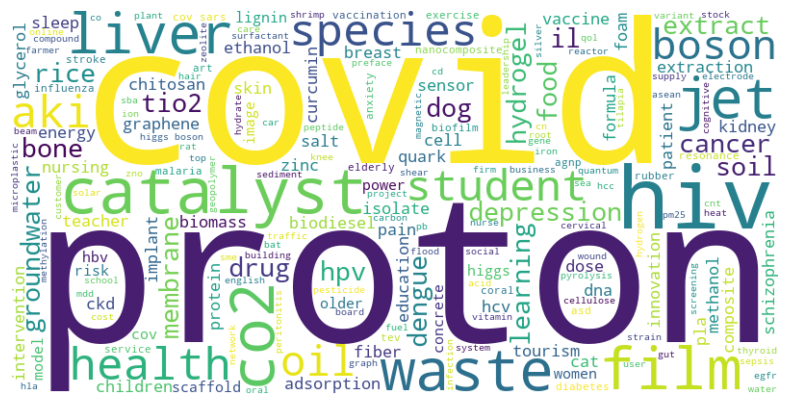

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
#data = {'Top_Two_Keywords': ['AI, Machine Learning', 'Deep Learning, AI', 'Neural Networks, AI']}
#df = pd.DataFrame(data)

# Combine all keywords into one string
all_keywords = ', '.join(df['Top_Two_Keywords']).replace(", ", " ")

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
